Topic:        **Challenge Set 3**
Subject:      Movie Data (source: Box Office Mojo - 2013_movies.csv)
Date:         10/04/2020
Name:         Ganesh Bala
Worked with:  other students' name
Location:     onl20_ds4/student_submissions/challenges/bala_ganesh/challenge_set_3_ganeshbala.ipynb

In [101]:
import sys
print("Python Version:", sys.version)

Python Version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


In [102]:
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta
import dateutil.parser

import matplotlib.pyplot as plt
import seaborn as sns

import html5lib

In [103]:
sns.set()
%matplotlib inline

In [104]:
# Add a comma and keep to two d.p.
pd.options.display.float_format = '{:,.2f}'.format

##**LOAD THE 2013 MOVIES DATA FILE**

In [105]:
url = '/Users/ganeshbala/onl20_ds4/student_submissions/challenges/bala_ganesh/2013_movies.csv.html'

In [154]:
table = pd.read_html(url)
movies = pd.concat(table)
df=movies.drop(columns=['Unnamed: 0']).reset_index()
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
#df['ReleaseMonth'] = df['ReleaseDate'].dt.strftime('%b')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               100 non-null    int64         
 1   Title               100 non-null    object        
 2   Budget              89 non-null     float64       
 3   DomesticTotalGross  100 non-null    int64         
 4   Director            96 non-null     object        
 5   Rating              100 non-null    object        
 6   Runtime             100 non-null    int64         
 7   ReleaseDate         100 non-null    datetime64[ns]
 8   ReleaseYear         100 non-null    int64         
 9   ReleaseMonth        100 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 7.9+ KB


In [156]:
df.head()

,index,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseYear,ReleaseMonth
0,0,The Hunger Games: Catching Fire,"130,000,000.00",424668047,Francis Lawrence,PG-13,146,2013-11-22,2013,11
1,1,Iron Man 3,"200,000,000.00",409013994,Shane Black,PG-13,129,2013-05-03,2013,5
2,2,Frozen,"150,000,000.00",400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,2013,11
3,3,Despicable Me 2,"76,000,000.00",368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,2013,7
4,4,Man of Steel,"225,000,000.00",291045518,Zack Snyder,PG-13,143,2013-06-14,2013,6


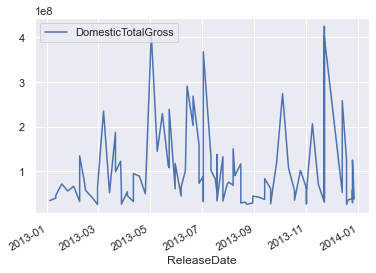

In [144]:
# Ch-3.1: Plot domestic total gross over time.

df.plot(x='ReleaseDate', y='DomesticTotalGross')

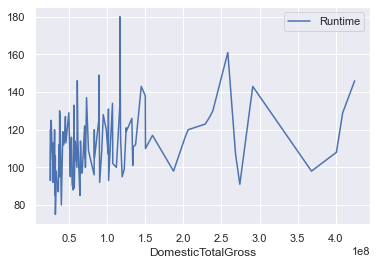

In [162]:
# Ch-3.2: Plot runtime vs. domestic total gross.

df.plot(y='Runtime', x='DomesticTotalGross')

In [146]:
# Ch-3.3: Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

grouped_rating= df.groupby("Rating").agg({'Runtime':'mean', 'DomesticTotalGross':'mean'})
print(grouped_rating)

        Runtime  DomesticTotalGross
Rating                             
G        107.00      268,492,764.00
PG        99.93      131,135,716.07
PG-13    117.51      111,449,769.02
R        110.73       69,892,429.00


In [111]:
# Ch-3.4: Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.



In [147]:
# Ch-3.5:What director in your dataset has the highest gross per movie?
highest_grosser= df.loc[df['DomesticTotalGross'].idxmax()]
highest_grosser['Director']

'Francis Lawrence'

In [159]:
# Ch-3.6:Bin your dataset into months and make a bar graph of the mean domestic total gross by month. 
    #Error bars will represent the standard error of the mean.
    #Title of graph should include: Mean Domestic Total Gross by Month in 2013
    #Topic for consideration: what is the correct formula for the standard error of the mean? 
    #Examine the error bars and see if they are "reasonable."
    
month_df= df.groupby('ReleaseMonth').agg({ 'DomesticTotalGross':'mean'})

month_df

,DomesticTotalGross
ReleaseMonth,
1,"49,543,237.20"
2,"67,386,013.71"
3,"96,097,096.22"
4,"60,940,719.50"
5,"177,409,720.50"
6,"150,650,005.75"
7,"105,780,721.92"
8,"68,531,263.09"
9,"61,712,314.33"


NameError: name 'x_pos' is not defined

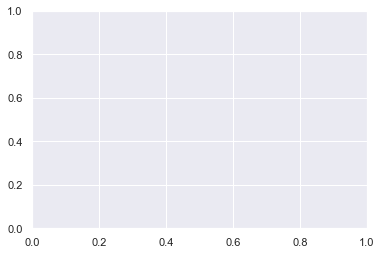

In [161]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, ReleaseMonth, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Domestic Total Gross Dollars')
ax.set_xticks(x_pos)
ax.set_xticklabels(ReleaseMonth)
ax.set_title('Mean Domestic Total Gross by Month in 2013')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

NameError: name 'x_pos' is not defined

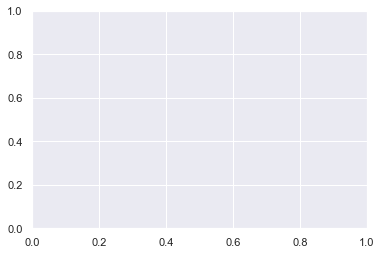

In [123]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Domestic Total Gross Dollars')
ax.set_xticks(x_pos)
ax.set_xticklabels(ReleaseMonth)
ax.set_title('Mean Domestic Total Gross by Month in 2013')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)